## Derived Insights from the dataset

### Vehicle Type Distribution
This plot shows the popularity among each vehicle type and detailed information on each vehicle type and average ratings for each vehicle type


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df1 = pd.read_csv('data_cleaned.csv')

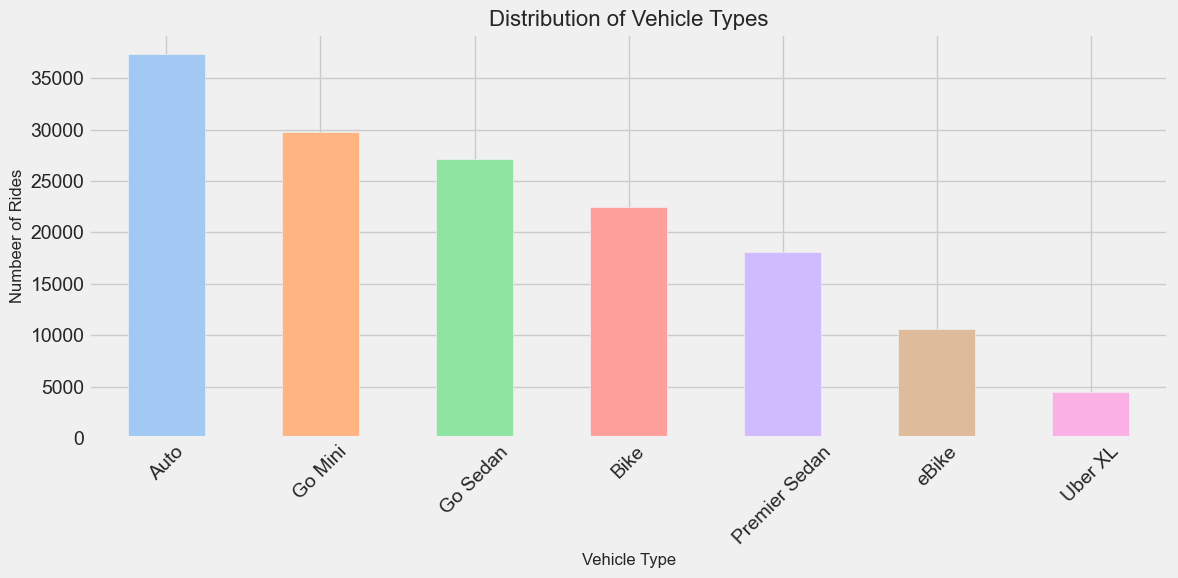

In [12]:
plt.figure(figsize=(12,6))
df1['Vehicle Type'].value_counts().plot(kind='bar', color=sns.color_palette("pastel"))
plt.title('Distribution of Vehicle Types', fontsize=16)
plt.xlabel('Vehicle Type', fontsize=12)
plt.ylabel('Numbeer of Rides', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('visualization/vehicle_type_dist.png')
plt.show()



In [13]:
vehicle_avg_table = df1.groupby('Vehicle Type').agg({
    'Ride Distance': 'mean',
    'Customer Rating': 'mean',
    'Driver Ratings': 'mean',
    'Booking Value': 'mean'
}).rename(columns={
    'Ride Distance': 'Average Ride Distance(km)',
    'Customer Rating': 'Average Customer Rating',
    'Driver Ratings': 'Average Driver Rating',
    'Booking Value': 'Average Booking Value(rs)'
})

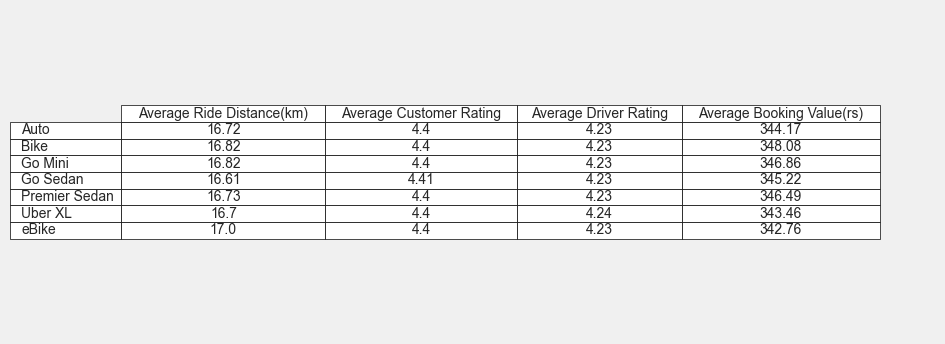

In [14]:
vehicle_avg_table_rounded = vehicle_avg_table.round(2)
fig, ax = plt.subplots(figsize=(10, 4))
ax.axis('off')
table = ax.table(cellText=vehicle_avg_table_rounded.values,
                 colLabels=vehicle_avg_table_rounded.columns,
                 rowLabels=vehicle_avg_table_rounded.index,
                 loc='center',
                 cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(vehicle_avg_table_rounded.columns)+1)))

plt.savefig('visualization/vehicle_stats.png', bbox_inches='tight')
plt.show()
#fix ride distance

### Distribution of Cancellation Reasons
The below chart shows number of rides cancelled and reason for cancellation

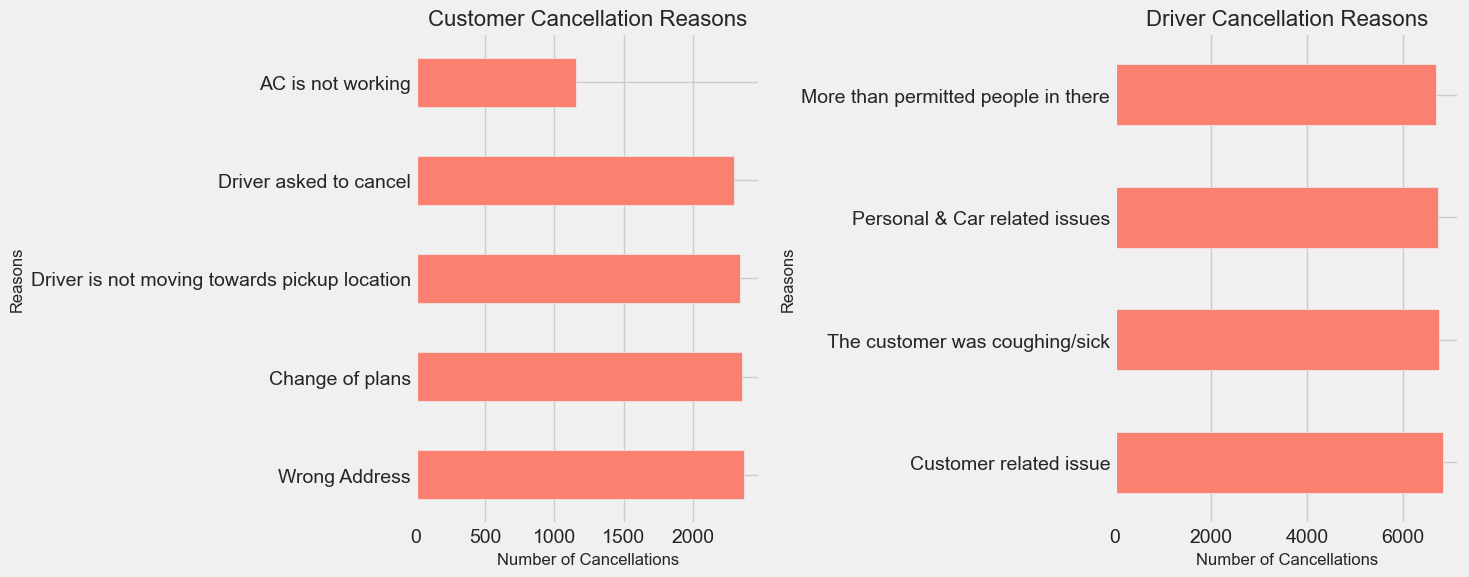

In [15]:
customer_reasons = df1[df1['Cancelled Rides by Customer'] > 0]['Reason for cancelling by Customer'].value_counts()
driver_reasons = df1[df1['Cancelled Rides by Driver'] > 0]['Driver Cancellation Reason'].value_counts()

plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
customer_reasons.plot(kind='barh', color='salmon')
plt.title('Customer Cancellation Reasons', fontsize=16)
plt.xlabel('Number of Cancellations', fontsize=12)
plt.ylabel('Reasons', fontsize=12)
plt.tight_layout()

plt.subplot(1,2,2)
driver_reasons.plot(kind='barh', color='salmon')
plt.title('Driver Cancellation Reasons', fontsize=16)
plt.xlabel("Number of Cancellations", fontsize=12)
plt.ylabel("Reasons", fontsize=12)
plt.tight_layout()
plt.savefig('visualization/Cancellation.png')
plt.show()


### Total Number of Rides by Booking Status
The below graph shows status of all rides on the dataset

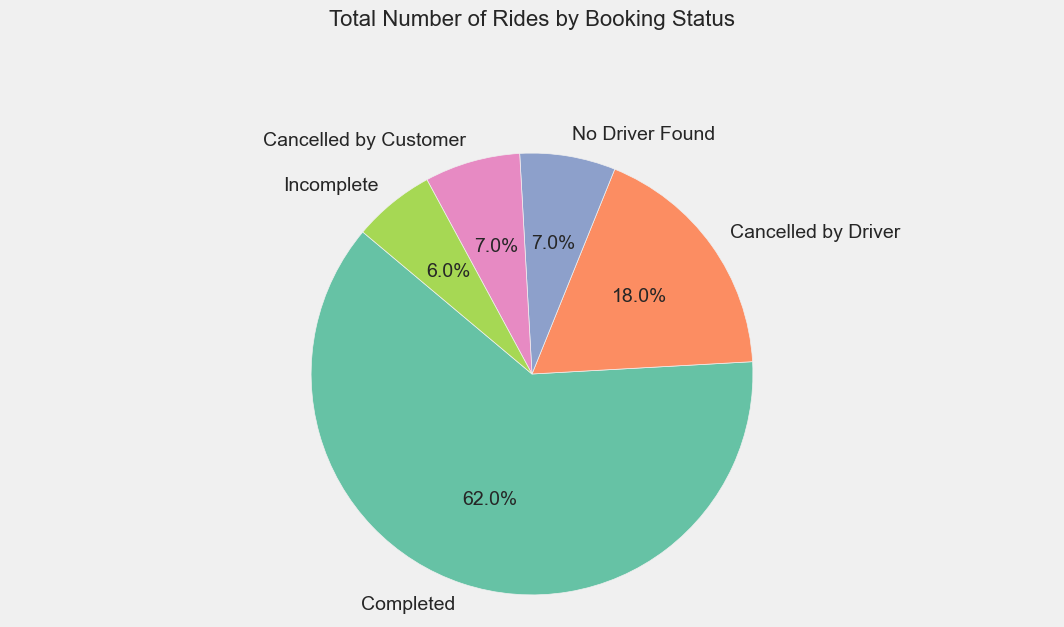

In [16]:
ride_status_count = df1['Booking Status'].value_counts()
plt.figure(figsize=(12,6))
plt.pie(ride_status_count, labels=ride_status_count.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))
plt.title("Total Number of Rides by Booking Status", fontsize=16, y=1.2)
plt.axis('equal')
plt.savefig('visualization/Booking_status.png')
plt.show()


In [17]:
df1.head()

,Unnamed: 0,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,...,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method,Date,Time,Month,Datetime,Hour
0,0,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,0.0,0.0,False,...,0.0,0.00,NaN,NaN,No Payment Made,2024-03-23,2025-08-17 12:29:38,3,2024-03-23 12:29:38-17:00,12
1,1,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,False,...,237.0,5.73,NaN,NaN,UPI,2024-11-29,2025-08-17 18:01:39,11,2024-11-29 18:01:39-17:00,18
2,2,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,False,...,627.0,13.58,4.9,4.9,Debit Card,2024-08-23,2025-08-17 08:56:10,8,2024-08-23 08:56:10-17:00,8
3,3,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,False,...,416.0,34.02,4.6,5.0,UPI,2024-10-21,2025-08-17 17:17:25,10,2024-10-21 17:17:25-17:00,17
4,4,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,False,...,737.0,48.21,4.1,4.3,UPI,2024-09-16,2025-08-17 22:08:00,9,2024-09-16 22:08:00-17:00,22


### Analyzing Peak Demand Hours

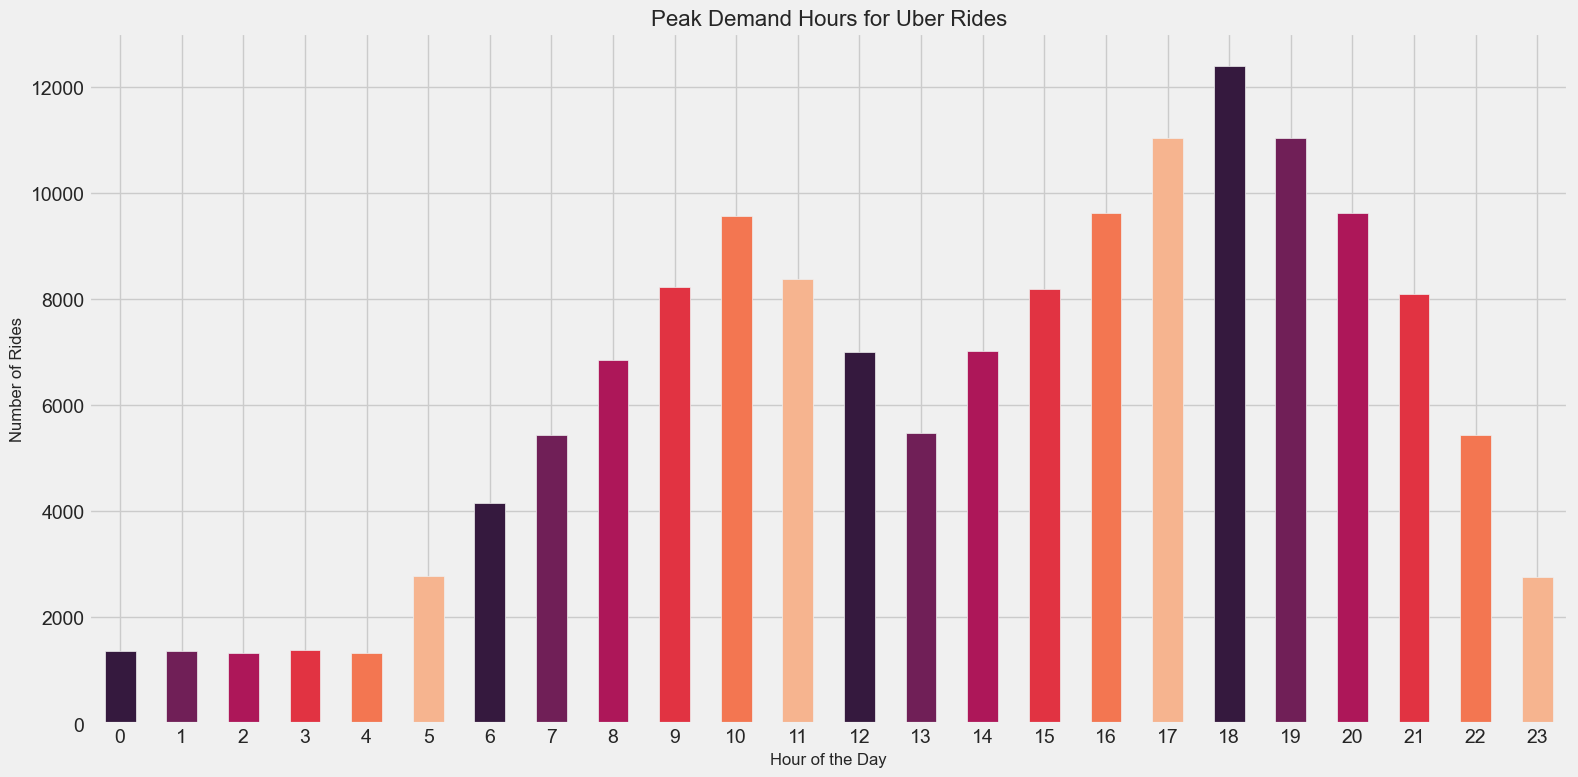

In [26]:
#Analyzing Peak Demand Hours
sns.set_style("whitegrid")
plt.style.use('fivethirtyeight')

hourly_ride_count = df1['Hour'].value_counts().sort_index()

plt.figure(figsize=(16,8))
hourly_ride_count.plot(kind='bar', color=sns.color_palette("rocket"))
plt.title('Peak Demand Hours for Uber Rides', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Number of Rides', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('visualization/peak_demand_hours.png')
plt.show()

### Finding Cancellation Hotspots

In [27]:
#Identifying Cancellation Hotspot
cancelled_rides = df1[(df1['Booking Status'] == 'Cancelled by Driver') | (df1['Booking Status'] == 'Cancelled by Customer')]

cancellation_hotspots = cancelled_rides['Pickup Location'].value_counts().head(10)
print("\n Top 10 Locations with Highest Cancellation Rates:")
print(cancellation_hotspots)


 Top 10 Locations with Highest Cancellation Rates:
Pickup Location
Saket             249
Akshardham        248
Pragati Maidan    248
Vinobapuri        244
Nehru Place       244
Shivaji Park      243
GTB Nagar         242
Kadarpur          238
AIIMS             236
Rajiv Nagar       236
Name: count, dtype: int64


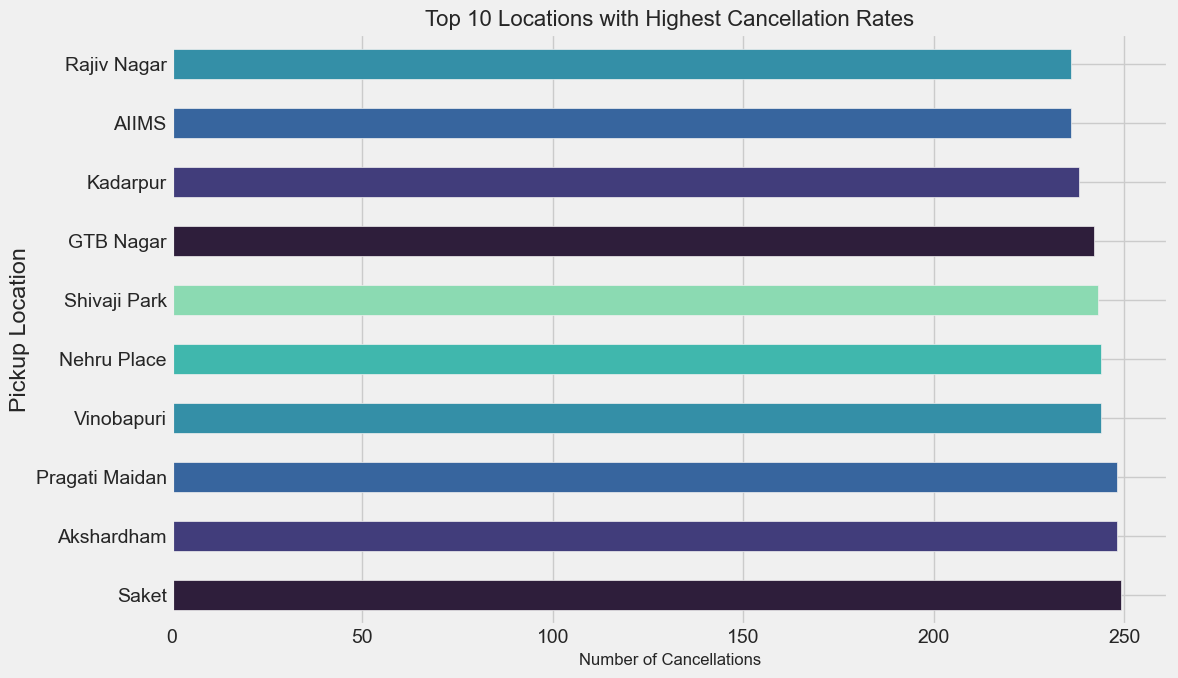

In [28]:
#Plotting Cancellation Hotspots
plt.figure(figsize=(12,7))
cancellation_hotspots.plot(kind='barh', color=sns.color_palette("mako"))
plt.title('Top 10 Locations with Highest Cancellation Rates', fontsize=16)
plt.xlabel('Number of Cancellations', fontsize=12)
plt.tight_layout()
plt.savefig('visualization/cancellation_hotspots.png')
plt.show()


### Busiest Pickup and Dropoff locations


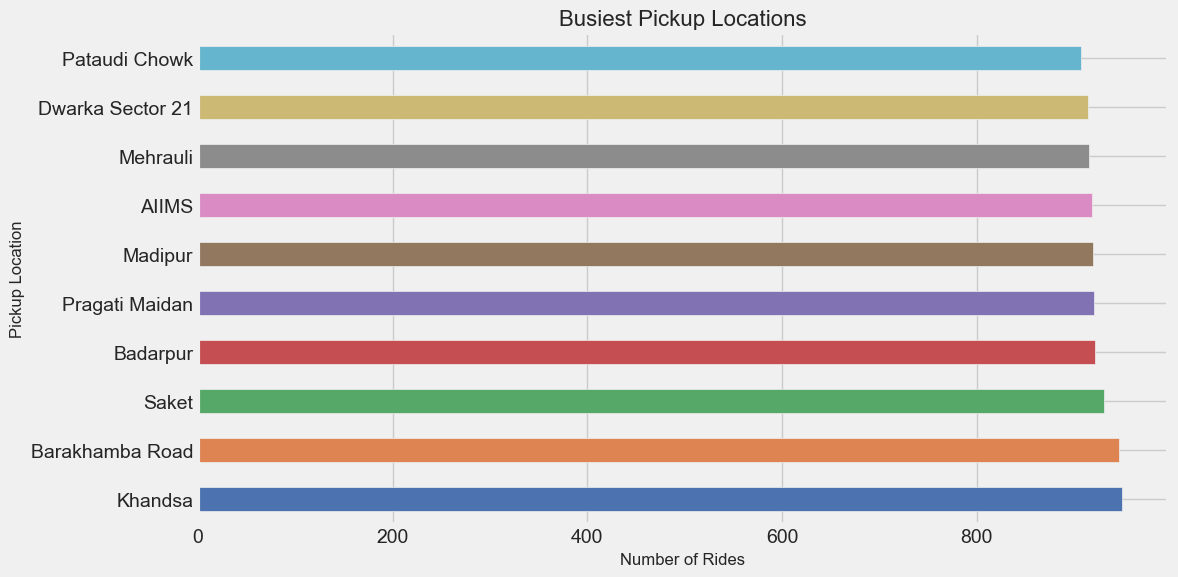

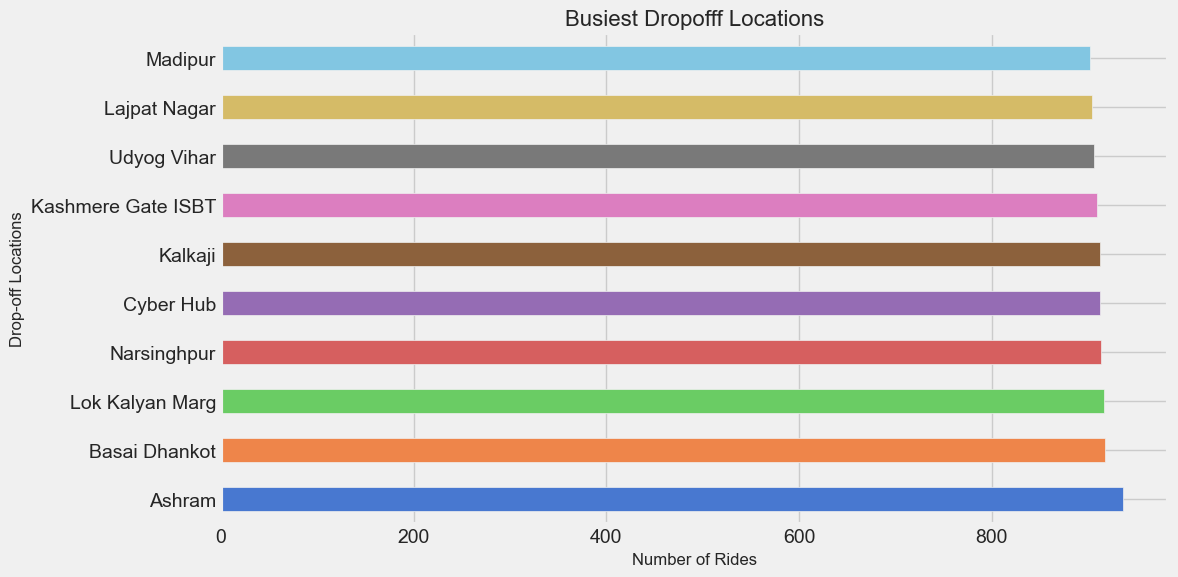

In [31]:
busiest_pickup_locations = df1['Pickup Location'].value_counts().head(10)
busiest_dropoff_locations = df1['Drop Location'].value_counts().head(10)    

#Plot busiest pickup locations
plt.figure(figsize=(12,6))
busiest_pickup_locations.plot(kind='barh', color=sns.color_palette("deep"))
plt.title('Busiest Pickup Locations', fontsize=16)
plt.xlabel('Number of Rides', fontsize=12)
plt.ylabel('Pickup Location', fontsize=12)
plt.tight_layout()
plt.savefig('visualization/busiest_pickup_locations.png')
plt.show()

#Plot busiest dropoff locations
plt.figure(figsize=(12,6))
busiest_dropoff_locations.plot(kind='barh', color=sns.color_palette("muted"))
plt.title('Busiest Dropofff Locations', fontsize=16)
plt.xlabel('Number of Rides', fontsize=12)
plt.ylabel('Drop-off Locations', fontsize=12)
plt.tight_layout()
plt.savefig('visualization/busiest_dropoff_locations.png')
plt.show()

### Ride Distance vs. Booking Value

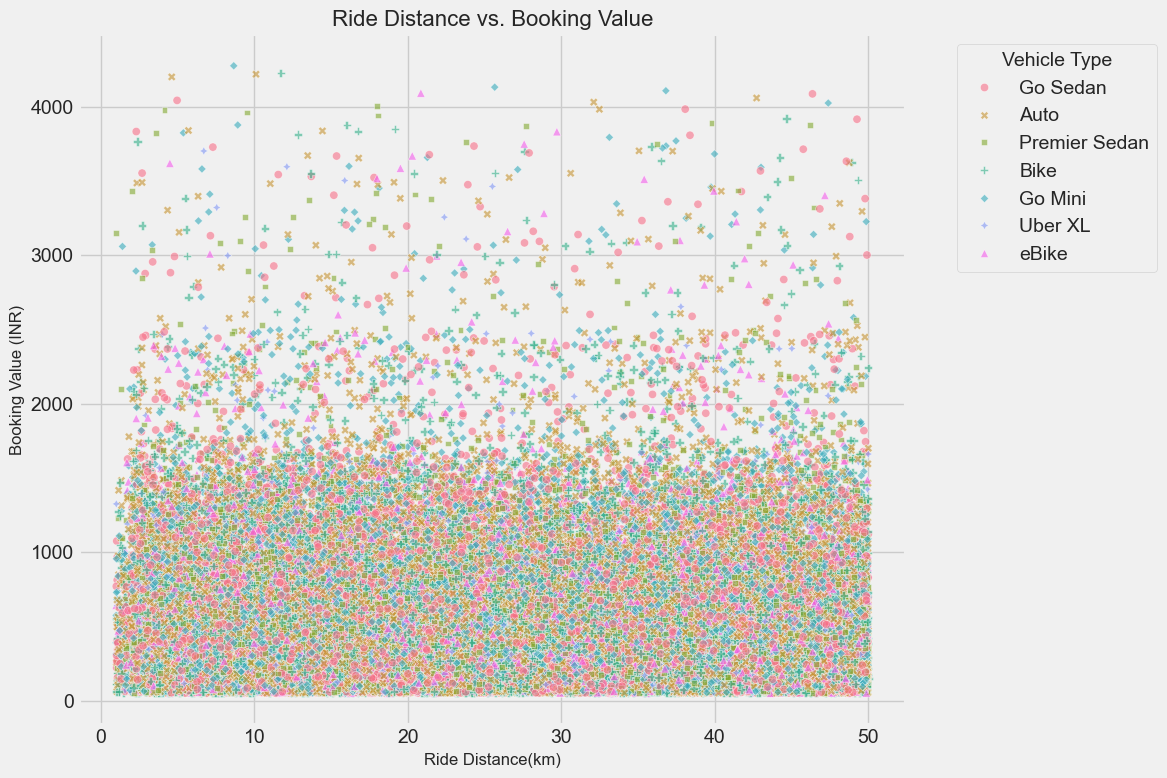

 The correlation between Ride Distance and Booking Value is: 0.01


In [40]:
completed_rides_df = df1[(df1['Booking Value'] > 0) & (df1['Ride Distance'] > 0)].copy()

plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='Ride Distance',
    y='Booking Value',
    data=completed_rides_df,
    hue='Vehicle Type',
    style='Vehicle Type',
    alpha=0.6
)

plt.title('Ride Distance vs. Booking Value', fontsize=16)
plt.xlabel('Ride Distance(km)', fontsize=12)
plt.ylabel('Booking Value (INR)', fontsize=12)
plt.legend(title='Vehicle Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('visualization/ride_distance_vs_booking_value.png')
plt.show()

#Correlation Analysis
correlation = completed_rides_df[['Ride Distance', 'Booking Value']].corr().iloc[0, 1]
print(f" The correlation between Ride Distance and Booking Value is: {correlation:.2f}")

### 